In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from os import path, getcwd, chdir
import numpy as np

In [3]:
# set path of the .npz file

path = f"{getcwd()}/mnist.npz"

In [4]:
# using the mnist data from keras database

mnist = tf.keras.datasets.mnist

In [5]:
# splitting the data into training and test set

(x_train, y_train),(x_test, y_test) = mnist.load_data(path=path)

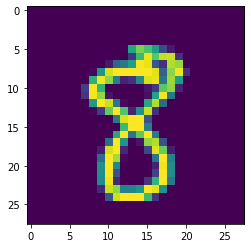

In [6]:
# Checking training data

plt.imshow(x_train[46])

In [7]:
# Creating the function to train model 

def train_mnst():
    
    # creating the callback class to stop the training when accuracy reached 99%
    class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs = {}):
            if(logs.get('accuracy') > 0.99):
                print("\n\n\nReached 99% accuracy so cancelling training!")
                self.model.stop_training = True
    
    # Using the mnist data from keras database
    mnist = tf.keras.datasets.mnist
    
    # Splitting the data into training and test set
    (x_train, y_train),(x_test, y_test) = mnist.load_data(path=path)
    
    # Normalising data
    x_train = x_train / 255
    x_test = x_test / 255
    
    # Calling the callback call
    callbacks = myCallback()
    
    # Initiating the model with one hidden layer
    model = tf.keras.Sequential([tf.keras.layers.Flatten(),
                                 tf.keras.layers.Dense(units = 1024, activation = tf.nn.relu),
                                 tf.keras.layers.Dense(units = 10, activation = tf.nn.softmax)])
    
    # Compiling the model with Adam optimizer and loss function sparse_categorical_crossentropy
    model.compile(optimizer = tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    # Fitting the model 
    history = model.fit(x_train, y_train, epochs = 10, callbacks = [callbacks])
    
    return model,history.epoch, history.history['accuracy'][-1]

In [8]:
# Running the training fucntion

model, history, accuracy = train_mnst()

Epoch 1/10
60000/60000 [==============================] - 13s 218us/sample - loss: 0.1828 - accuracy: 0.9452
Epoch 2/10
60000/60000 [==============================] - 14s 237us/sample - loss: 0.0739 - accuracy: 0.9772
Epoch 3/10
60000/60000 [==============================] - 12s 203us/sample - loss: 0.0490 - accuracy: 0.9844
Epoch 4/10
60000/60000 [==============================] - 12s 207us/sample - loss: 0.0345 - accuracy: 0.9885
Epoch 5/10
59744/60000 [============================>.] - ETA: 0s - loss: 0.0258 - accuracy: 0.9915


Reached 99% accuracy so cancelling training!
60000/60000 [==============================] - 11s 187us/sample - loss: 0.0258 - accuracy: 0.9915


In [9]:
# Displaying the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  803840    
_________________________________________________________________
dense_1 (Dense)              multiple                  10250     
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Evaluating the test data with the trained model

model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 80us/sample - loss: 14.4848 - accuracy: 0.9823


[14.48479708804041, 0.9823]

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
4


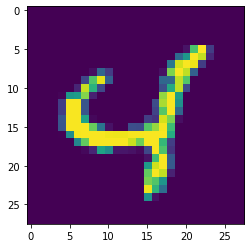

In [11]:
# Checking the test data

classifications = model.predict(x_test)

plt.imshow(x_test[67])

print(classifications[67])
print(y_test[67])